<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Иван! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что получилось!</b></font>

# Изучение рынка общественного питания Москва

- Автор: Соловьев Иван
- Дата: 25.06.2025

### Цели и задачи проекта

Провести исследовательский анализ рынка Москвы, результаты которого помогут инвесторам в выборе подходящего места.

## Данные
Для анализа поступили данные о заведениях общественного питания. Данные состоят из двух датасетов:
`/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания;
`/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания:
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее.

### Описание датасета `rest_info`
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
     - 0 — заведение не является сетевым;
     - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.
### Описание датасета `rest_price`



- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
     - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
     - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
     - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
     - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
     - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
     - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `rest_price_df`.

In [5]:
# Устанавливаем библиотеку phik
!pip install phik 


In [6]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Ошибка кода. Перед отправкой проекта на проверку надо проверять тетрадку на исполнение кода без ошибок. Так как при ошибке ревьюер должен прекратить проверку и вернуть проект. 😢 <br>В этот раз я сам вставлю правильный код и перезапущу тетрадку, что бы ее можно было проверить до конца. </font>
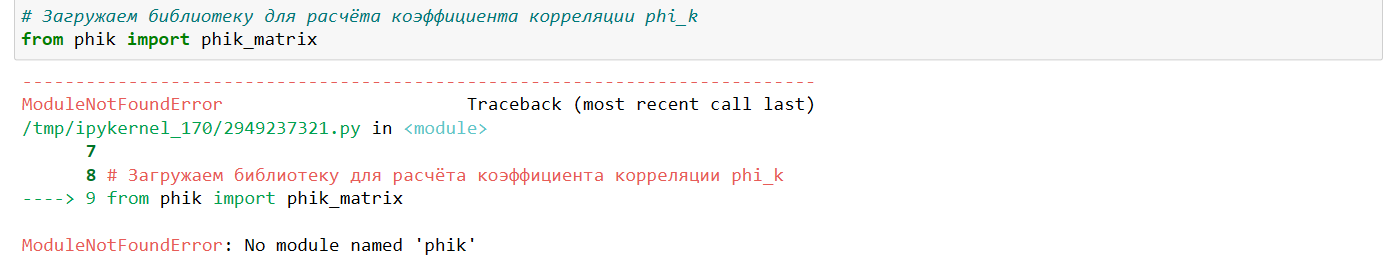

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Замечение исправлено

In [37]:
# Выгружаем данные в переменные rest_df и rest_info_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Очень хорошо! Загрузка датасетов непосредственно с сервера и все равно от куда запускается тетрадка. 👍</font>

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [38]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [39]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет rest_info.csv содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов можно оставить в исходном виде.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Стоит отметить, что можно оптимизировать размерность данных в столбце `chain`, который показывает, является ли заведение сетевым и содержит значения 1 или 0.  
- Пропуски содержатся только в столбцах `hours` и `seats`. Столбец `seats` содержит наибольшее количество пропусков.


Познакомимся с данными датасета `rest_price.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [40]:
### Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [41]:
### Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет rest_price.csv содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:
- Названия столбцов можно оставить в исходном виде.
- Типы данных соответствуют содержимому во всех столбцах.
- Пропуски содержатся во всех столбцах, кроме `id` Самое большое количество пропусков содержится в столбце `middle_coffee_cup`.
- Значения в столбцах соответствуют описанию.

Первичное знакомство с данными показывает, что данные хорошего качества. Однако, в нескольких столбцах есть пропуски и нужно их проверить.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исследовали общую информацию о датасетах и сделали промежуточные выводы.</font>

### Подготовка единого датафрейма

Объединим датафреймы `rest_df` и `rest_price_df`

In [42]:
# Соединяем данные в единый датафрейм df
df = rest_df.merge(rest_price_df, on = 'id', how = 'left')

In [43]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех ресторанах и чеках сохранилась. Можно приступать к предобработке данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно объединили датасеты в одну таблицу, проверили результат.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Лучше перед обработкой данных делать контроль размера датасета до и после обработки. Примерно вот так:</font>

In [44]:
# Комментарий ревьюера
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
# только не надо эту копию потом использовать в проекте
temp = df.copy() 
len(temp)

8406

## 2. Предобработка данных

Оптимизируем целочисленный тип данных в столбце `chain`.

In [45]:
# Оптимизируем тип данных в столбце chain
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

Выведем информацию о датафрейме после оптимизации типа данных в столбце `chain`

In [46]:
# Выведем информацию о датафрейме после оптимизации столбца chain
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Можно понизить разрядность числовых данных с 64 до 32, примерно вот так:<br>
`for column in ['rating','middle_avg_bill','middle_coffee_cup','seats']:`<br>
&nbsp;&nbsp;&nbsp;&nbsp;`df[column] = pd.to_numeric(df[column], downcast='float')`</font>

Данные оптимизированы. Можно приступать к обработке пропущенных значений.

In [47]:
# Посчитаем количество пропущенных значений в каждом столбце датафрейма
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [48]:
# Посчитаем % пропущенных значений в каждом столбце датафрейма
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что пропуски изучены в абсолютных и относительных значениях.</font><br>
<font color='DarkMagenta'>👉 Можно вот так вывести информацию о пропусках:</font>

In [49]:
# Комментарий ревьюера
import pandas as pd        # Импортируем билиотеку (вдруг она не установлена в окружении)
tmp = df.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
hours,536,0.063800
seats,3611,0.429600
price,5091,0.605600
avg_bill,4590,0.546000
middle_avg_bill,5257,0.625400
middle_coffee_cup,7871,0.936400


Пропуски встречаются сразу в `6` столбцах датафрейма, проанализируем каждый из них:
1. Столбец `hours` (536 пропусков, 6.4%)
   - *Гипотеза*: Возможно, информация о часах работы не была указана в источнике данных.
   - *Решение*: Оставляем пропуски, как есть.
2. Столбец `seats` (3611 пропусков, 42.97%)
   - *Гипотеза*: Для некоторых заведений (например, кофеен с выносной формой обслуживания) количество посадочных мест может быть не указано.
   - *Решение*: Оставить пропуски как есть.
3. Столбец `price` (5091 пропуск, 60.56%)
    - *Гипотеза*: Ценовая категория не указана для некоторых заведений.
    - *Решение*: Оставить пропуски как есть.
4. Столбец `avg_bill` (4590 пропусков, 54.60%)
    - *Гипотеза*: Информация о среднем чеке отсутствует в исходных данных.
    - *Решение*: Оставить как есть, так как у нас есть числовые значения в middle_avg_bill.
5. Столбец `middle_avg_bill` (5257 пропуска, 86.82%)
    - *Гипотеза*: Большинство заведений не являются кофейнями, поэтому цена капучино не указана.
    - *Решение*: Оставить как есть.
6. Столбец `middle_coffee_cup` (7871 пропуск, 93.64%)
    - *Гипотеза*: Средний чек не указан или не соответствует формату "Средний счёт".
    - *Решение*: Оставить как есть.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, проанализированы пропуски, сделаны предположения о причинах и рассмотрены варианты их обработки.</font>

Проверим, есть ли полностью дублирующиеся строки в датафрейме.

In [50]:
# Проверка на явные дубликаты
duplicates = df.duplicated()
print(f"Количество явных дубликатов: {duplicates.sum()}")

Количество явных дубликатов: 0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font>

Явные дубликаты в датафрейме отсутствуют. Проверим уникальные значения в категориальных столбцах:

In [51]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district','price']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбце category:'

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

'Уникальные значения в столбце district:'

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

'Уникальные значения в столбце price:'

array(['высокие', 'выше среднего', 'низкие', 'средние', nan], dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали проверку уникальных значений в столбцах.</font>

В трех вышеперечисленных столбцах данные не требуют оптимизации и редактирования.

Сохраним количество уникальных строк до предобработки данных по столбцам `name` и `addresss`:

In [52]:
name_prev = df['name'].nunique()
address_prev = df['address'].nunique()

Неявные дубликаты могут быть в столбцах с названиями или адресами заведений. Для этого нормализуем текстовые данные (приведем к нижнему регистру и удалим лишние пробелы) и проверим дубликаты по данным столбцам.

In [53]:
# Данные выглядят корректно, приведем весь текст в нижний регистр и удалим лишние пробелы.
for column in ['name', 'address']:
    df[column] = df[column].str.lower().str.strip()
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, привели к одному регистру названия заведений и адреса и удалили конечные пробелы.</font>

In [54]:
# Считаем количество уникальных комбинаций после предобработки в двух столбцах
name_new = df['name'].nunique()
address_new = df['address'].nunique()

In [55]:
print(f'Количество уникальных значений в столбце name: до предобработки - {name_prev}, после предобработки - {name_new}')

Количество уникальных значений в столбце name: до предобработки - 5614, после предобработки - 5512


In [56]:
print(f'Количество уникальных значений в столбце address: до предобработки - {address_prev}, после предобработки - {address_new}')

Количество уникальных значений в столбце address: до предобработки - 5753, после предобработки - 5752


In [57]:
duplicates = df.duplicated(subset=['name','address'], keep = 'first')
sum_duplicates = duplicates.sum()
display(f'Количество дубликатов в комбинации Заведение - Адрес: {sum_duplicates}')

'Количество дубликатов в комбинации Заведение - Адрес: 4'

In [58]:
# Рассмотрим строки дубликаты:
duplicates = df.duplicated(subset=['name','address'], keep = False)
duplicated_rows = df[duplicates]
display(duplicated_rows)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


На основании данной информации видно, что 4 заведения являются дубликатами, но отличаются только графиком работы. Поскольку по всем четырем отсутствуют стоимостные показатели, можно данные дубликаты не удалять, искажения данных не возникнет.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, обработали дубликаты.</font>

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [59]:
# Создаём столбец is_24_7 для определения заведений, которые работают 24/7
mode_1 = df['hours'].str.contains('круглосуточно', case=False)
mode_2 = df['hours'].str.contains('ежедневно', case=False)
df['is_24_7'] = mode_1 & mode_2

In [60]:
# Выводим последние строки датафрейма на экран (в них есть круглосуточные)
df.tail()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,kebab time,кафе,"москва, россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0,NaN,NaN,NaN,NaN,True


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Корректно создан столбец с бинарным признаком ежедневной и круглосуточной работы заведения и других.</font>

In [61]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7676
True      730
Name: is_24_7, dtype: int64

In [62]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8406 
 Удалено строк в датасете после обработки 0 
 Процент потерь 0.0


---

### Промежуточный вывод

В ходе предобработки данных у столбца `chain` был оптимизирован тип данных.

Анализ показал, что основные столбцы, по которым будет проведен анализ (`category`, `district`, `rating`, `chain`), не имеют пропусков.
Столбцы, содержащие информацию о среднем чеке в заведениях, имеют долю пропусков от 40 до 93%. Это может говорить о том, что пользователям, оставляющим свой отзыв и оценку заведения, не требовалось в обязательном порядке вводить эти данные. Владельцы заведения так же не были заинтересованы в указании цен, т.к. они являются не постоянными и могут ввести в заблуждение потенциальных посетителей, чем вызвать у последних негативные эмоции.

В трех основных столбцах (`category`, `district`,`price_category`) проведенный анализ показал отсутствие некорректных значений, повторов или пропусков. Данные не требуют оптимизации и редактирования.

Столбцы name и address оптимизированы: удалены лишние пробелы, символы заменены на строчные. Количество уникальных значений сократилось в столбцe `name` c `5614` до `5512`, а в столбце `address` с `5753` до `5752` соответственно.

При этом выявлено, что 4 заведения являются практически полными дубликатами, но отличаются только графиком работы. Поскольку по всем четырем отсутствуют стоимостные показатели, можно данные дубликаты не удалять, искажения данных в количественных значениях не значительное.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следует расширить промежуточный вывод, указав об объединении таблиц.</font>

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Анализ категории заведений. Исследуем количество объектов общественного питания по каждой категории.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Перед визуализацией необходимо провести анализ количества заведений общественного питания в абсолютных и относительных значениях. Примерно вот так: </font>
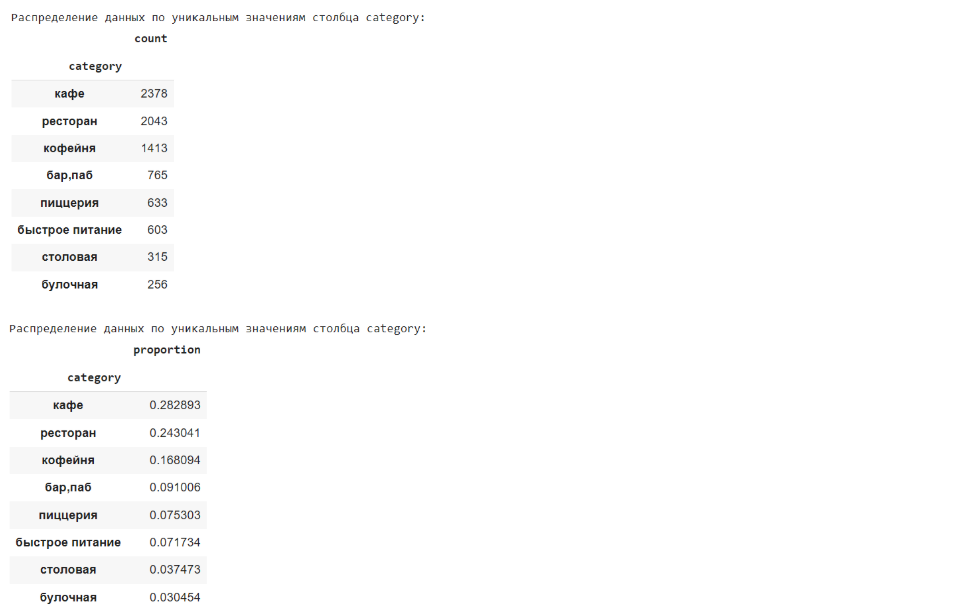

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Замечение исправлено

In [69]:
# Подсчитываем абсолютные значения по категориям
category_counts = df['category'].value_counts(ascending = False)
print("Количество заведений по категориям:")
print(category_counts)

# Подсчитываем относительных значений
category_percents = df['category'].value_counts(normalize=True)
print("\nДоля заведений по категориям (%):")
print(category_percents.round(2))

Количество заведений по категориям:
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Доля заведений по категориям (%):
кафе               0.28
ресторан           0.24
кофейня            0.17
бар,паб            0.09
пиццерия           0.08
быстрое питание    0.07
столовая           0.04
булочная           0.03
Name: category, dtype: float64


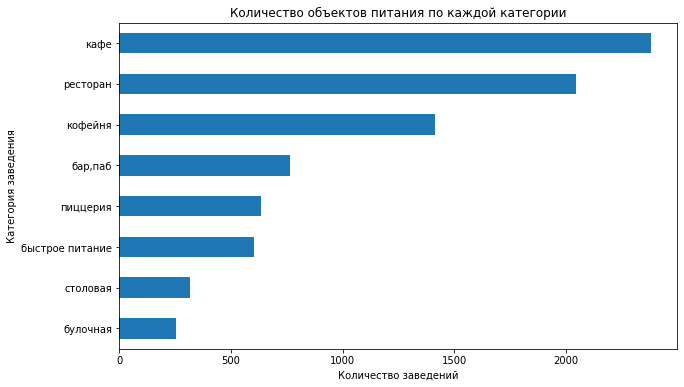

In [70]:
# Строим линейчатую диаграмму
plt.figure(figsize=(10, 6))
df['category'].value_counts(ascending = True).plot(kind='barh', x='category_counts', y='category', legend=False)

# Добавляем подписи к осям и заголовок
plt.ylabel('Категория заведения')
plt.xlabel('Количество заведений')
plt.title('Количество объектов питания по каждой категории')

# Показываем график
plt.show()


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Анализ показал, что лидирующие позиции занимают кафе, рестораны и кофейни. Эти заведения представляют тройку лидеров.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что анализ заканчивается промежуточным выводом с описанием полученных результатов. </font>

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

Исследуем распределение заведений по административным районам Москвы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Перед визуализацией необходимо провести анализ количества заведений по административным районам в абсолютных и относительных значениях. Примерно вот так: </font>
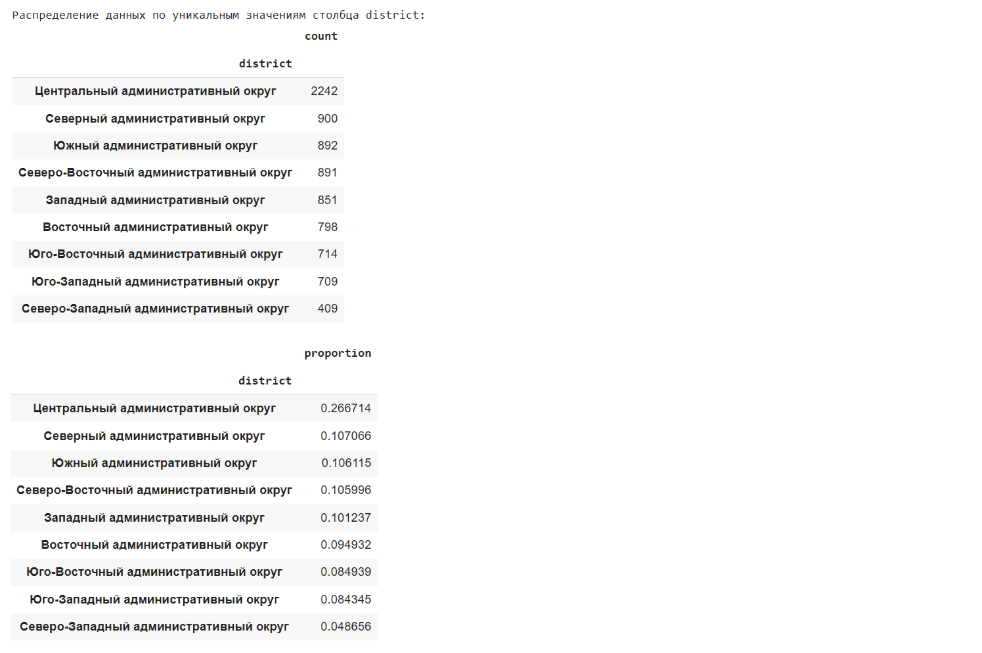

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Замечение исправлено

In [76]:
# Подсчитываем абсолютные значения по районам Москва
district_counts = df['district'].value_counts(ascending = False)
print("\nКоличество заведений по округам:")
print(district_counts)

# Подсчитываем относительные значения по районам Москва
district_percents = df['district'].value_counts(normalize=True)
print("\nДоля заведений по округам (%):")
print(district_percents.round(2))



Количество заведений по округам:
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Доля заведений по округам (%):
Центральный административный округ         0.27
Северный административный округ            0.11
Южный административный округ               0.11
Северо-Восточный административный округ    0.11
Западный административный округ            0.10
Восточный административный округ           0.09
Юго-Восточный административный округ       0.08
Юго-Западный административный округ        0.08
Северо-Западный административный округ     0.05
Name: district, dtype: float64


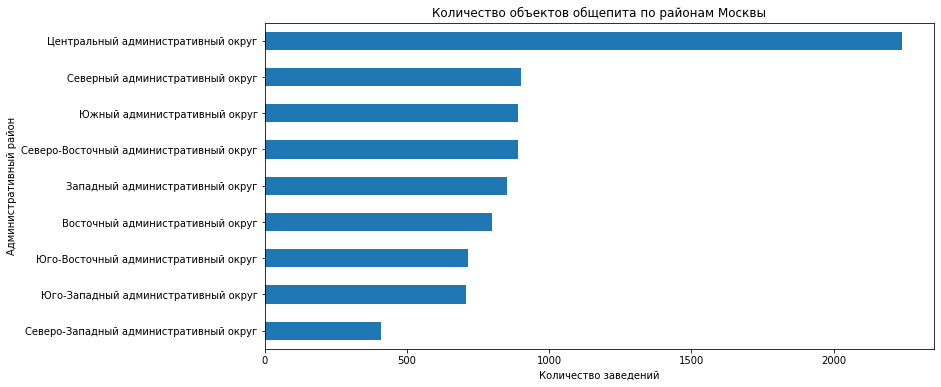

In [77]:
# Подсчитываем абсолютные значения по районам Москва
district_counts = df['district'].value_counts(ascending = True)

# Строим линейчатую диаграмму
plt.figure(figsize=(12, 6))
df['district'].value_counts(ascending = True).plot(kind='barh', x='district_counts', y='district', legend=False)

# Добавляем подписи к осям и заголовок
plt.ylabel('Административный район')
plt.xlabel('Количество заведений')
plt.title('Количество объектов общепита по районам Москвы')

# Показываем график
plt.show()


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для визуализации используем горизонтальную столбчатую диаграмму.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И здесь перед визуализацией необходимо провести анализ количества заведений по ЦАО в абсолютных и относительных значениях.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Добавлен анализ кол-ва заведений по ЦАО в абсолютных и относительных значениях.

In [80]:
# Фильтруем данные для 'Центральный административный округ' 
filtered_df = df[df['district'] == 'Центральный административный округ']

# Считаем абсолютные значения по ЦАО г. Москвы
count_cao = filtered_df['category'].value_counts(ascending = False)
print("\nКоличество заведений по ЦАО:")
print(count_cao)

# Подсчитываем относительные значения по районам Москва
count_cao_percents = filtered_df['category'].value_counts(normalize=True)
print("\nДоля заведений по ЦАО (%):")
print(count_cao_percents.round(2))


Количество заведений по ЦАО:
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

Доля заведений по ЦАО (%):
ресторан           0.30
кафе               0.21
кофейня            0.19
бар,паб            0.16
пиццерия           0.05
быстрое питание    0.04
столовая           0.03
булочная           0.02
Name: category, dtype: float64


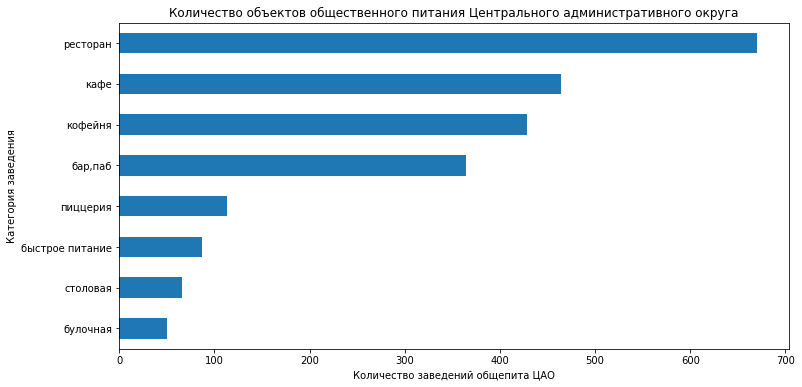

In [81]:
# Строим линейчатую диаграмму
plt.figure(figsize=(12, 6))
filtered_df['category'].value_counts(ascending = True).plot(kind = 'barh', x='count_cao', y='category', legend=False)

# Добавляем подписи к осям и заголовок
plt.ylabel('Категория заведения')
plt.xlabel('Количество заведений общепита ЦАО')
plt.title('Количество объектов общественного питания Центрального административного округа')

# Показываем график
plt.show()
              
                        



Центральный административный округ - зона присутствия большего количества заведений.
Не смотря на то, что кол-во заведений в нем более, чем в 2 раза превышает прочие округа Москвы, тройка "лидеров" остается та же, что и по всем остальным территориальным объектам: кафе, рестораны и кофейни.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что анализ заканчиваем промежуточным выводом с описанием полученных результатов.</font>

---

### Задача 3
Соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Описание добавлено.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует описания поставленной задачи.</font>

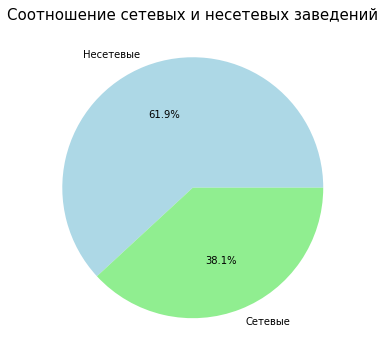

In [85]:
# Соотношение сетевых и несетевых заведений
chain_counts = df['chain'].value_counts()

# Визуализация
plt.figure(figsize=(6, 6))
plt.pie(chain_counts, labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Соотношение сетевых и несетевых заведений', fontsize=15)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не проверили распределение сетевых и не сетевых заведений в абсолютных значениях.</font>

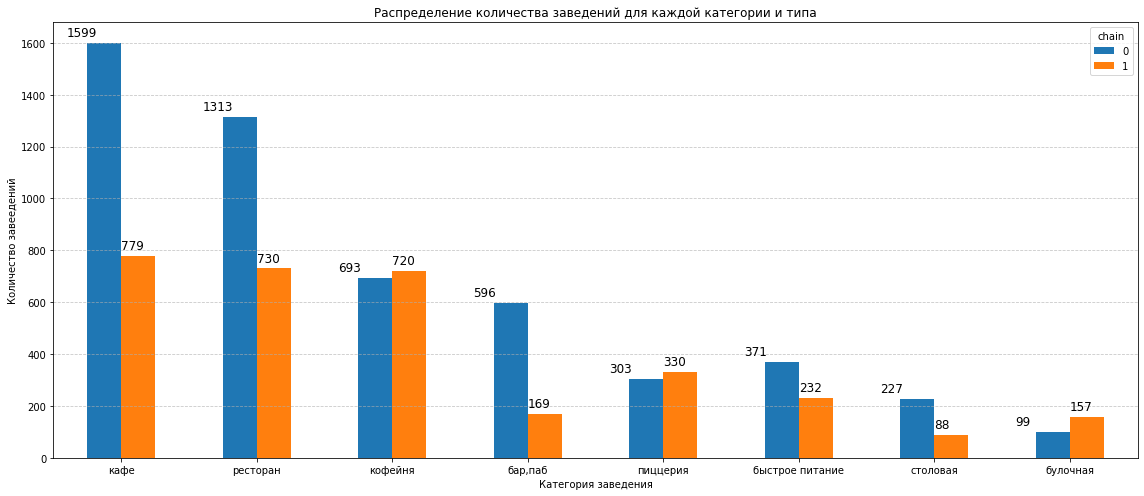

In [86]:
# Построим график столбчатой диаграммы
grouped = df.groupby(['category','chain']).size().unstack(fill_value=0) #считаем количество записей

# Подсчитываем общее количество заведений для каждой категории
grouped['total'] = grouped.sum(axis=1)

# Сортируем по общему количеству заведений в убывающем порядке
grouped = grouped.sort_values(by='total', ascending=False)

# Удаляем колонку с общим количеством для визуализации
grouped.drop('total', axis=1, inplace=True)

ax = grouped.plot(kind='bar',
               title=f'Распределение количества заведений для каждой категории и типа',
               legend=True,
               ylabel='Количество завеедений',
               xlabel='Категория заведения',
               rot=0,
               figsize=(16, 7))

# Получаем ширину каждого столбца
width = 0.8 / len(grouped.columns)

# Добавляем подписи для каждого столбца
for i, col in enumerate(grouped.columns):
    for j, val in enumerate(grouped[col]):
        # Вычисляем позицию для текста
        x = j - width * (len(grouped.columns) / 2) + width * i
        y = val + 14  # Отступ сверху
        
        # Добавляем текст
        ax.text(x, y, str(val), ha='left', va='bottom', fontsize=12, color='black')

# Выводим график
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Вот так более наглядно, среди каких категорий заведений преобладают сетевые.</font>
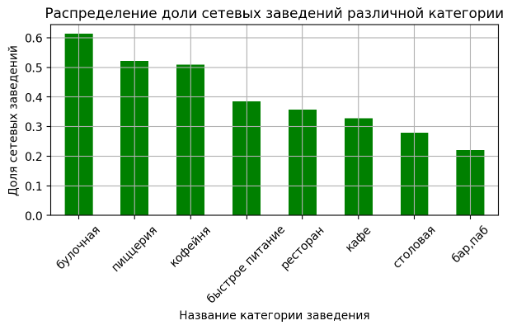

Из общего количества заведений общ.питания только 38% являются сетевыми.
Сетевые заведения преобладают в категориях кофеен, булочных и пиццерий. Доля не сетевых заведений составляет 68%. В основном это кафе, рестораны, бары/пабы. В них количество несетевых более, чем в 2 раза превышает кол-во сетевых.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали промежуточный вывод по сетевым и не сетевым заведениям и категориям сетевых заведений.</font>

---

### Задача 4
Исследование количества посадочных мест в заведениях.

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Описание добавлено.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует описания поставленной задачи.</font>

Исследуем количество посадочных мест в заведениях:

In [90]:
display('Информация о количестве посадочных мест:')
display(df['seats'].describe())

'Информация о количестве посадочных мест:'

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для анализа посадочных мест заведений посмотрели сводную статистику.</font><br>
<font color='DarkMagenta'>👉 Следовало построить гистограмму, она бы показала распределение посадочных мест в заведениях, разброс данных и форму распределения, примерно вот так:</font>
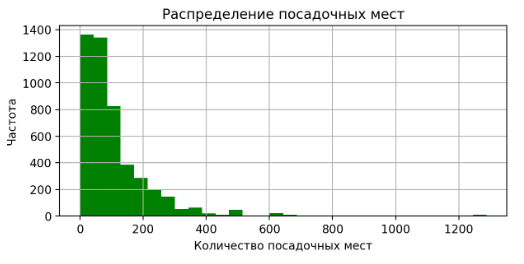<br>
<font color='DarkMagenta'>👉 Следовало построить диаграмму размаха для визуализации распределение посадочных мест в заведениях, наличия выбросов и оценки симметрии распределения данных. Примерно вот так (треугольник показывает среднее значение):</font>
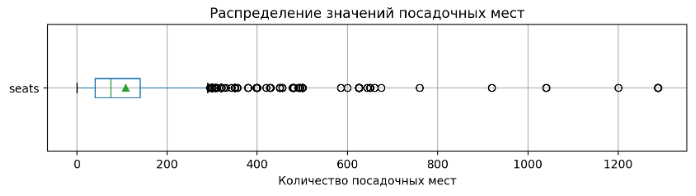

In [91]:
count_seats = df[df['seats']==df['seats'].max()]
display(f'Всего заведений с аномально большим количеством посадочных мест: {count_seats.shape[0]} шт.')
display(count_seats['category'])

'Всего заведений с аномально большим количеством посадочных мест: 11 шт.'

6518    ресторан
6524    ресторан
6574    пиццерия
6641     кофейня
6658     бар,паб
6684     бар,паб
6690    ресторан
6771        кафе
6807        кафе
6808    ресторан
6838     кофейня
Name: category, dtype: object

Анализ показал, что в данных присутствуют аномальные значения.
11 заведений имеют 1288 посадочных мест. Такое кол-во посадочных мест возможно в спортивно-концертных комплексах или фуд-кортах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А заведения питания в спортивно-концертных комплексах или фуд-корты не могут иметь такое количество посадочных мест?</font>

In [97]:
# Вычисляем квартили Q1 и Q3
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1
# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR
display(f'Верхний порог выбросов: {upper_bound}')

'Верхний порог выбросов: 290.0'

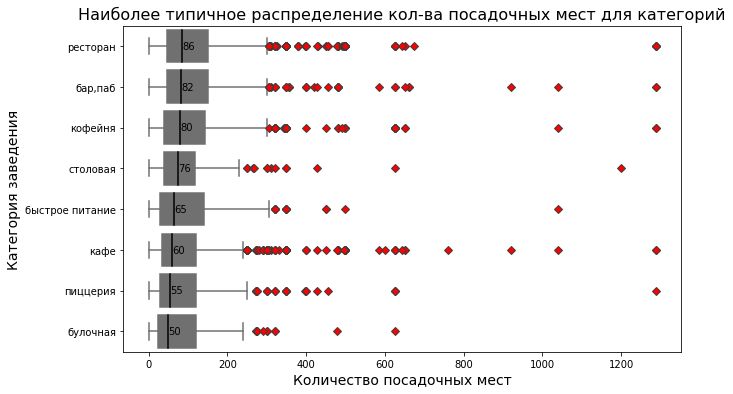

In [98]:
# Вычисляем медиану для каждой категории
median_seats = df.groupby('category')['seats'].median().reset_index()

# Сортируем категории по медиане в порядке убывания
sorted_categories = median_seats.sort_values('seats', ascending=False)['category']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Определяем единый цвет для всех элементов
box_color = '#707070'

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(x=df['seats'],
            y=df['category'],
            order=sorted_categories,
            flierprops=dict(markerfacecolor='r', marker='D'),
            boxprops={'color': box_color},
            whiskerprops={'color': box_color},
            medianprops={'color': '#000000'},
            capprops={'color': box_color},
            saturation=10)  # насыщенность цвета

for i, category in enumerate(sorted_categories):
    median_value = median_seats.loc[median_seats['category'] == category, 'seats'].values[0]
    plt.text(median_value + 0.5, i, f'{median_value:.0f}', ha='left', va='center', color='black', fontsize=10)

# Добавляем заголовок и метки осей
plt.title('Наиболее типичное распределение кол-ва посадочных мест для категорий',fontsize=16,)
plt.xlabel('Количество посадочных мест',fontsize=14,)
plt.ylabel('Категория заведения',fontsize=14,)

# Выводим график
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Убрана фильтрация выбросов.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необоснованная фильтрация выбросов, она искажает анализ. Медианы как раз предназначены для анализа данных с выбросами.</font>

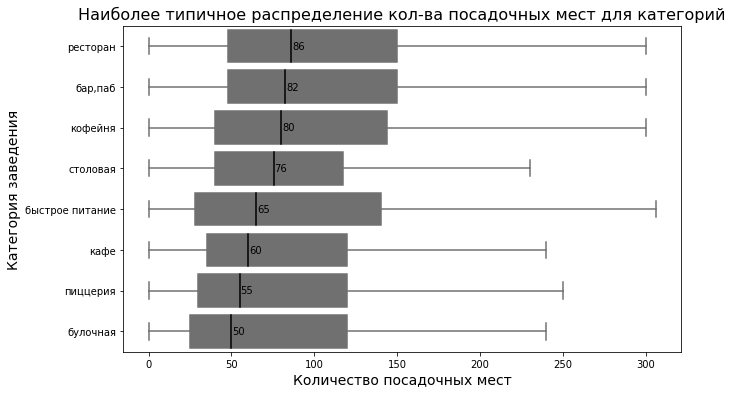

In [99]:
# Вычисляем медиану для каждой категории
median_seats = df.groupby('category')['seats'].median().reset_index()

# Сортируем категории по медиане в порядке убывания
sorted_categories = median_seats.sort_values('seats', ascending=False)['category']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Определяем единый цвет для всех элементов
box_color = '#707070'

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(x=df['seats'],
            y=df['category'],
            order=sorted_categories,
            showfliers=False,
            boxprops={'color': box_color},
            whiskerprops={'color': box_color},
            medianprops={'color': '#000000'},
            capprops={'color': box_color},
            saturation=10)  # насыщенность цвета

# Добавляем подписи медиан
for i, category in enumerate(sorted_categories):
    median_value = median_seats.loc[median_seats['category'] == category, 'seats'].values[0]
    plt.text(median_value + 0.5, i, f'{median_value:.0f}', ha='left', va='center', color='black', fontsize=10)

# Добавляем заголовок и метки осей
plt.title('Наиболее типичное распределение кол-ва посадочных мест для категорий',fontsize=16)
plt.xlabel('Количество посадочных мест',fontsize=14)
plt.ylabel('Категория заведения',fontsize=14)

# Выводим график
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Убрана фильтрация выбросов.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И тут фильтруем выбросы, тем самым искажая данные для построения диаграмм размаха. </font>

Исследование количества посадочных мест в заведениях показало наличие в данных аномальных значений.
Например, 11 заведений (это кафе, кофейни и т.п.) имеют 1288 посадочных мест. Такое кол-во посадочных мест возможно в спортивно-концертных комплексах или фуд-кортах.

В среднем типичное количество мест, расчитанное медианой, варьируется от 50 до 86. Пиццерии, булочные, кафе - это 50-60 мест, бары/пабы и рестораны - 82-86 мест. Заведения быстрого питания - 65 мест, столовые и кофейни - 76-80 мест.

Приведены диаграммы размаха для каждой категории заведений с наиболее типичным для него количеством посадочных мест.

### Задача 5

Исследование рейтинга заведений.

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Описание добавлено.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует описания поставленной задачи.</font>

Исследуем рейтинг заведений.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы посмотреть сводную статистику рейтингов всех заведений общественного питания  методом `describe()`.</font>

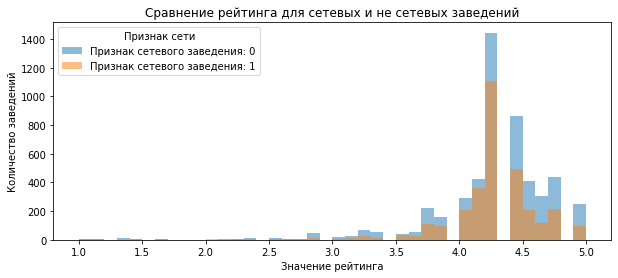

In [35]:
# Рассмотрим распределение рейтингов по критерию сетевое / несетевое заведение
# Строим гистограмму распределения значений рейтинга
column = 'rating'

# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения chain
for i in df['chain'].unique():
    # Фильтруем данные по значению столбца chain
    df.loc[df['chain'] == i, column].plot(
        kind='hist',
        #density=True,
        bins=40,
        alpha=0.5,
        label=f'Признак сетевого заведения: {i}')
    
# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение рейтинга для сетевых и не сетевых заведений')
plt.xlabel('Значение рейтинга')
plt.ylabel('Количество заведений')
plt.legend(title='Признак сети')
plt.show()

In [36]:
# Рассчитаем среднее и медианное значения рейтинга для сетевых и несетевых заведений
df.groupby('chain').agg({'rating':['mean','median']})

rating       
           mean median
chain                 
0      4.235416    4.3
1      4.220936    4.3

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало проанализировать вариации средних рейтингов по категориям заведений, для этого следует использовать метод `.describe()`. Примерно вот так:</font>
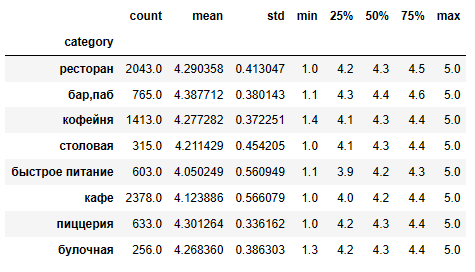

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Почему анализ проводиться по сокращенному датасету? Какое отношение выбросы в посадочных местах имеют к анализу рейтинга?</font>
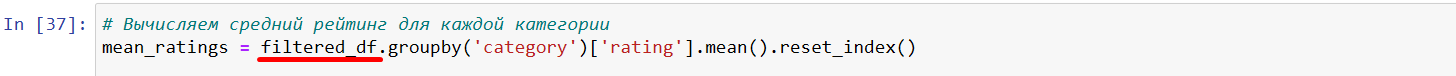

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Убрана фильтрация выбросов.

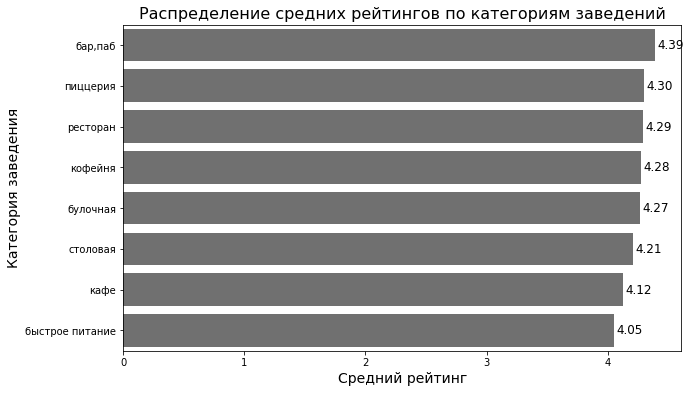

In [104]:
# Вычисляем средний рейтинг для каждой категории
mean_ratings = df.groupby('category')['rating'].mean().reset_index()

# Сортируем категории по среднему рейтингу в порядке убывания
sorted_categories = mean_ratings.sort_values('rating', ascending=False)

# Определяем единый цвет для столбцов
bar_color = '#707070'  # Цвет столбцов сервый

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму средних рейтингов
ax = sns.barplot(x='rating', y='category', data=sorted_categories, color=bar_color, saturation=1)

# Добавляем подписи данных
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02, p.get_y() + p.get_height()/2, f'{width:.2f}',
             va='center', fontsize=12, color='black')

# Добавляем заголовок и метки оси
plt.title('Распределение средних рейтингов по категориям заведений', fontsize=16)
plt.xlabel('Средний рейтинг', fontsize=14)
plt.ylabel('Категория заведения', fontsize=14)

# Выводим график
plt.show()

Из данного анализа видно, что средний рейтинг заведений не зависит от того, принадлежит ли заведение какой-либо сети или нет. Одинаковые значения как среднего 4,2, так и медианы 4,3 подтверждают это. При этом видно, что усреднённые рейтинги для разных типов общепита не сильно различаются и варьируются в этих пределах. Самый низкий рейтинг у заведений быстрого питания, самый высокий – у баров и пабов.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Необходимо будет откорректировать промежуточный вывод, после исправления ошибок.</font>

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [105]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats',
                         'price','is_24_7']].phik_matrix()
# Выводим результат
display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)


interval columns not set, guessing: ['rating', 'chain', 'seats']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно построена корреляционная матрица с использованием библиотеки `phik`, это позволяет не обращать внимание на линейность и не линейность взаимозависимости признаков и не использовать для них отдельные методы.</font>

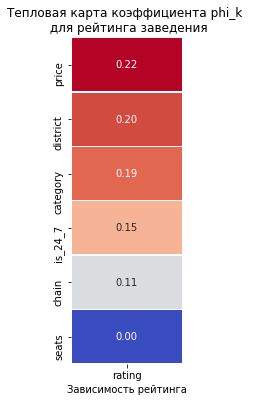

In [106]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками 
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для рейтинга заведения')
plt.xlabel('Зависимость рейтинга')

# Выводим график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно визуализирована корреляционная матрица.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необходимо вывести расчет значения среднего рейтинга для разных ценовых категорий заведений, примерно вот так:</font>
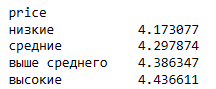

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Выведен расчет среднего значения рейтинга для разных ценовых категорий.

In [130]:
# Группируем данные по ценовой категории и вычисляем средний рейтинг
price_rating = df.groupby('price')['rating'].mean().reset_index()

# Сортируем категории в логическом порядке
price_order = ['низкие', 'средние', 'выше среднего', 'высокие']
price_rating['price'] = pd.Categorical(price_rating['price'], categories=price_order, ordered=True)
price_rating = price_rating.sort_values('price')

# Выводим результат
print("Средний рейтинг по ценовым категориям:")
print(price_rating.to_string(index=False))

Средний рейтинг по ценовым категориям:
        price   rating
       низкие 4.173077
      средние 4.297874
выше среднего 4.386348
      высокие 4.436611


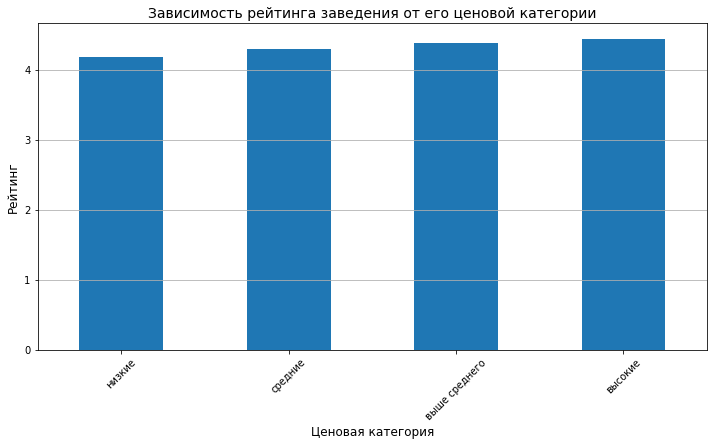

In [131]:
# Выбераем самую сильную связь и проверяем зависимость рейтинга
plt.figure(figsize=(12, 6))
df.groupby('price')['rating'].mean().sort_values().plot(kind='bar')
plt.title('Зависимость рейтинга заведения от его ценовой категории', fontsize=14)
plt.xlabel('Ценовая категория', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей и название графика  на русском языке, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font><br>
<font color='Red'>🛠 Данная визуализация диаграммой рассеяния не позволяет оценить рейтинг, так как каждая точка на графике означает данные по одному заведению. И сколько таких заведений находится в интервале рейтинга от 4 до 5 по диаграмме опредилить не возможно, а их количество может превышать количество заведений по другим категориям. Здесь уместна столбчатая диаграмма по среднему рейтингу.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Визуализации скорректированы и оформлены в соответствии с правилами оформления.

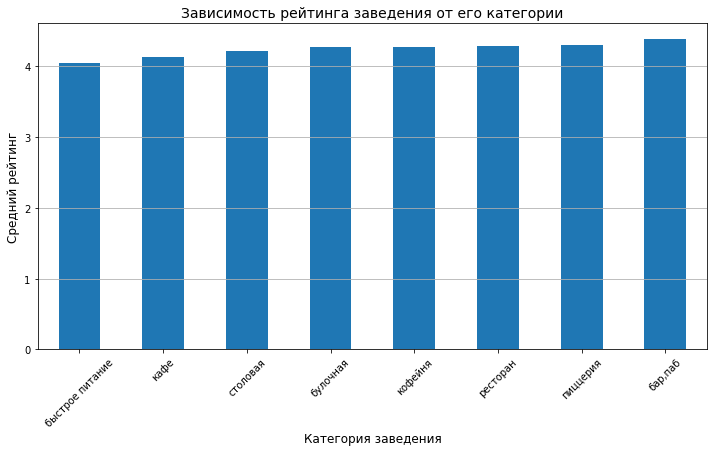

In [128]:
# Создаем столбчатую диаграмму среднего рейтинга по категориям
plt.figure(figsize=(12, 6))
df.groupby('category')['rating'].mean().sort_values().plot(kind='bar')
plt.title('Зависимость рейтинга заведения от его категории', fontsize=14)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Визуализация скорректирована и оформлена в соответствии с правилами оформления.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

Рейтинги заведений показывают самую сильную корреляцию со значениями столбца `price`.
Представлена визуализация зависимости рейтинга заведения от ценовой категории и от категории заведения.
Зависимость рейтинга от кол-во посадочных мест нулевая.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необходимо описать результат анализа взаимосвязи рейтинга заведений с ценовой категорией заведений.</font>

Наблюдается прямая зависимость между ценовой категорией заведения и его рейтингом: заведения с более высокой ценовой категорией имеют в среднем более высокий рейтинг.

Заведения категории "высокие" демонстрируют наибольший средний рейтинг (4.43), в то время как заведения категории "низкие" — наименьший (4.17).

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Добавлено описание результата анализа взаимосвязи рейтинга заведений с ценовой категорией заведений.

---

### Задача 7

Исследование Топ-15 популярных сетей в Москве.

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Добавлено описание поставленной задачи.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует описания поставленной задачи.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не создана таблица. Необходимо создать сводную таблицу с наименованием, категорией, количеством и средним рейтингом сетевых заведений.</font>
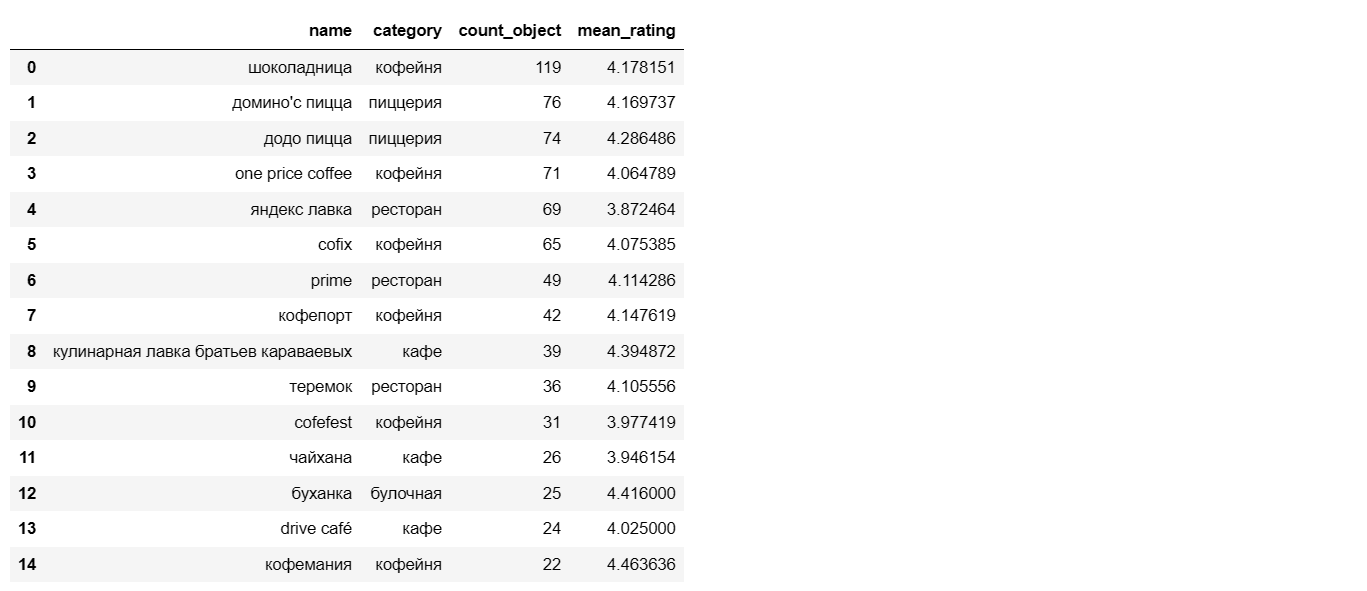

In [133]:
# Создаем сводную таблицу для сетевых заведений (chain = 1)
pivot_table = df[df['chain'] == 1].pivot_table(
    index=['name', 'category'],  # Группируем по названию и категории
    aggfunc={
        'id': 'count',          # Количество заведений
        'rating': 'mean'        # Средний рейтинг
    }
).reset_index()

# Переименовываем столбцы для удобства
pivot_table.columns = ['Название', 'Категория', 'Количество заведений', 'Средний рейтинг']

# Сортируем по количеству заведений (по убыванию)
pivot_table = pivot_table.sort_values('Количество заведений', ascending=False)

# Выводим первые 15 строк таблицы
display(pivot_table.head(15))

,Название,Категория,Количество заведений,Средний рейтинг
1126,шоколадница,кофейня,119,4.178151
496,домино'с пицца,пиццерия,76,4.169737
489,додо пицца,пиццерия,74,4.286486
205,one price coffee,кофейня,71,4.064789
1142,яндекс лавка,ресторан,69,3.872464
72,cofix,кофейня,65,4.075385
241,prime,ресторан,49,4.114286
617,кофепорт,кофейня,42,4.147619
632,кулинарная лавка братьев караваевых,кафе,39,4.394872
963,теремок,ресторан,36,4.105556


</font><font color='Blue'><b>Комментарий студента</b></font><br>

Создана сводная таблица с наименованием, категорией, количеством и средним рейтингом сетевых заведений.

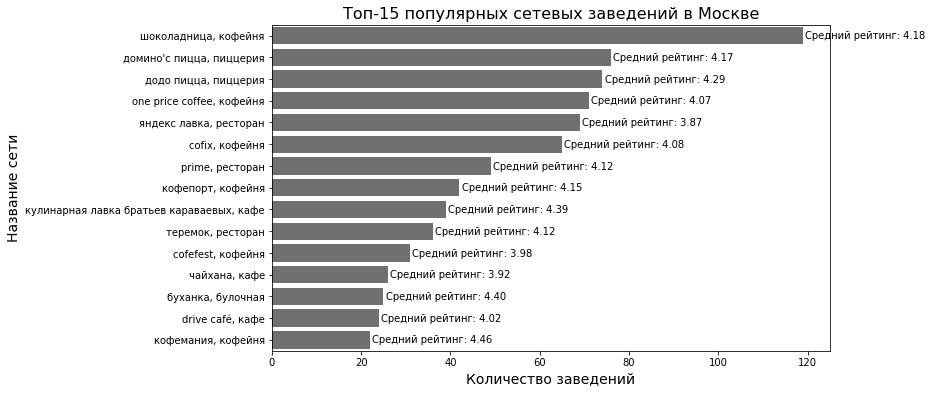

In [42]:
# Отбираем только сетевые заведения 
grouped_by_name = df[df['chain'] == 1]

# Группируем данные по названиям заведений и считаем количество заведений
grouped_by_name = grouped_by_name.groupby(['name','category']).size().reset_index(name='count')

# Сортируем по количеству заведений в порядке убывания и выбираем топ-15
top_15_networks = grouped_by_name.sort_values('count', ascending=False).head(15)

# Объединяем столбцы 'name' и 'category' в один новый столбец
top_15_networks['name_category'] = top_15_networks['name'] + ', ' + top_15_networks['category']

# Объединяем топ-15 сетей с исходными данными, чтобы посчитать средний рейтинг
top_15_with_ratings = pd.merge(top_15_networks, df, on='name')

# Считаем средний рейтинг для каждой из топ-15 сетей
mean_ratings = top_15_with_ratings.groupby('name')['rating'].mean().reset_index()

# Объединяем количество заведений и средний рейтинг
final_df = pd.merge(top_15_networks, mean_ratings, on='name')

# Визуализация
bar_color = '#707070'  # Цвет столбцов сервый
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='name_category', data=final_df, color=bar_color, saturation=1)

# Добавляем заголовок и метки оси
plt.title('Топ-15 популярных сетевых заведений в Москве', fontsize=16)
plt.xlabel('Количество заведений', fontsize=14)
plt.ylabel('Название сети', fontsize=14)

# Добавляем значения среднего рейтинга на график
for i, row in enumerate(final_df.itertuples()):
    plt.text(row.count + 0.5, i, f"Средний рейтинг: {row.rating:.2f}", va='center', fontsize=10)

# Выводим график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно визуализирован топ-15 сетевых заведений.</font>

In [43]:
display(f'Минимальный рейтинг топ-15 - {mean_ratings["rating"].min()}')
display(f'Максимальный рейтинг топ-15 - {mean_ratings["rating"].max()}')
display(top_15_networks['category'].sort_values().unique())

'Минимальный рейтинг топ-15 - 3.8724637681159404'

'Максимальный рейтинг топ-15 - 4.460869565217391'

array(['булочная', 'кафе', 'кофейня', 'пиццерия', 'ресторан'],
      dtype=object)

Топ-15 Москвы, рассчитанный по кол-ву заведений, представлен такими категориями заведений, как 'булочная',  'кафе',  'кофейня',  'пиццерия',  'ресторан' и имеет рейтинги от 3.87 до 4.46.

### Задача 8

Исследование вариации среднего чека заведения в зависимости от района Москвы.

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Добавлено описание поставленной задачи.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует описания поставленной задачи.</font>

Вариация среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Следовало проанализировать статистические показатели данных по среднему чеку заведений методом `.describe()`.</font><br>
<font color='Red'> Следует визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха, для оценки размаха распределения, его симметричности и наличия выбросов. Примерно вот так:</font>
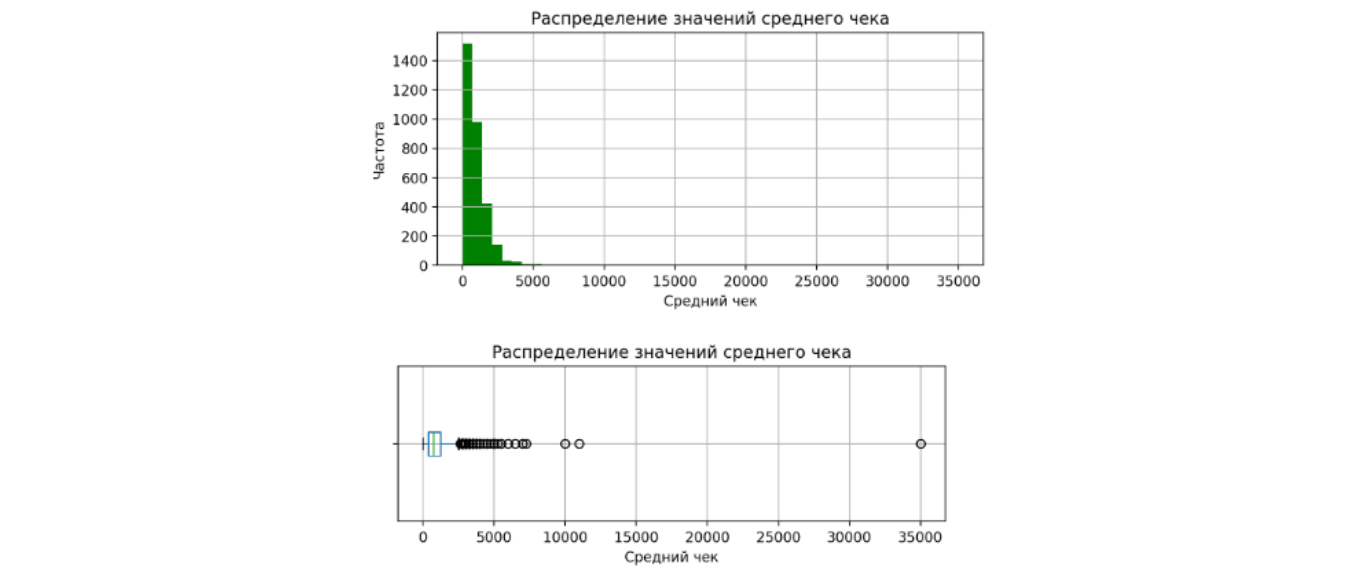

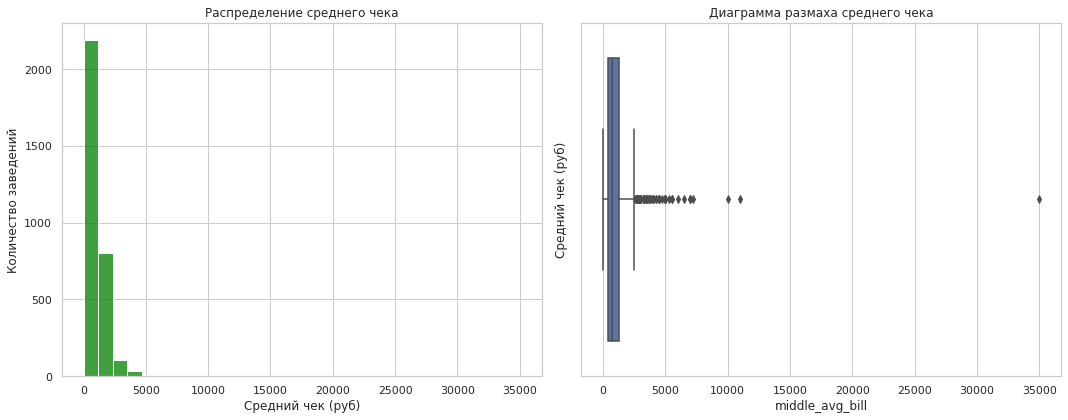

In [139]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма среднего чека
sns.histplot(data=df, x='middle_avg_bill', bins=30, ax=ax1, color = 'Green')
ax1.set_title('Распределение среднего чека')
ax1.set_xlabel('Средний чек (руб)')
ax1.set_ylabel('Количество заведений')

# Диаграмма размаха среднего чека
sns.boxplot(data=df, x='middle_avg_bill', ax=ax2)
ax2.set_title('Диаграмма размаха среднего чека')
ax2.set_ylabel('Средний чек (руб)')

plt.tight_layout()
plt.show()


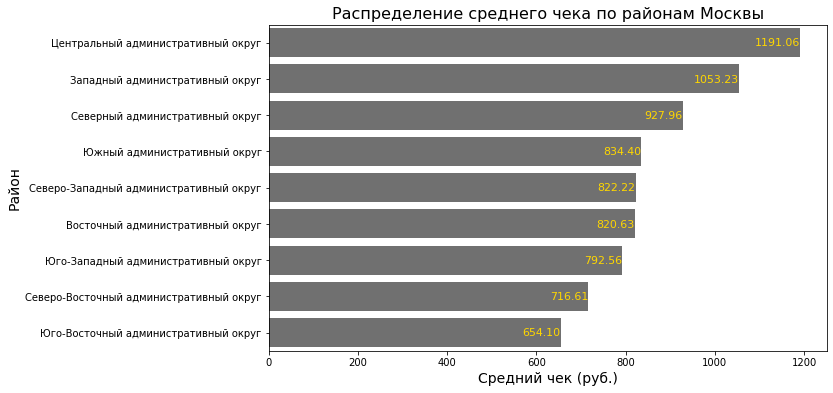

In [44]:
# Группируем данные по району и вычисляем средний чек
df_grouped = df.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем данные по среднему чеку для удобства визуализации
df_grouped = df_grouped.sort_values('middle_avg_bill', ascending=False)

# Визуализация горизонтальной диаграммы
#df_grouped.plot(kind='barh', x='district', y='middle_avg_bill', legend=True, figsize=(14, 6),
                #title='Вариация среднего чека по районам Москвы', fontsize=8)

# Визуализация
bar_color = '#707070'  # Цвет столбцов сервый
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='middle_avg_bill', y='district', data=df_grouped, color=bar_color, saturation=1)

# Добавляем дополнительные настройки
plt.title('Распределение среднего чека по районам Москвы', fontsize=16)
plt.xlabel('Средний чек (руб.)', fontsize=14)
plt.ylabel('Район', fontsize=14)

# Добавляем подписи значений среднего чека
for i, value in enumerate(df_grouped['middle_avg_bill']):
    bar_plot.text(value, i, f'{value:.2f}', va='center', ha='right', fontsize=11, color='gold')

# Выводим график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Хорошо визуализированы значения среднего чека заведений по административным округам. Можно было вывести на диаграмму и медианы, и средние значения, примерно вот так:</font>
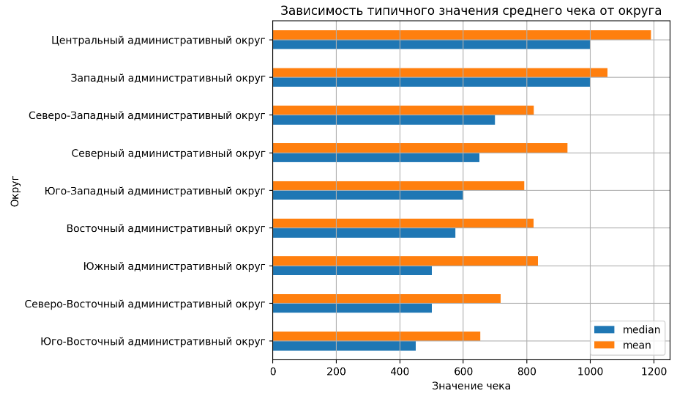

In [45]:
# Создание сводной таблицы
pivot_sales = pd.pivot_table(df, values='middle_avg_bill', index='district',
                             aggfunc={'middle_avg_bill': ['mean', 'max', 'median', 'min']})

# Сортировка по медиане
pivot_sales_sorted = pivot_sales.sort_values(by=('mean'), ascending=False)

# Вывод отсортированной сводной таблицы
display(pivot_sales_sorted)

,max,mean,median,min
district,,,,
Центральный административный округ,7250.0,1191.057547,1000.0,0.0
Западный административный округ,5250.0,1053.225490,1000.0,50.0
Северный административный округ,11000.0,927.959627,650.0,130.0
Южный административный округ,35000.0,834.398089,500.0,100.0
Северо-Западный административный округ,2900.0,822.222930,700.0,120.0
Восточный административный округ,10000.0,820.626923,575.0,50.0
Юго-Западный административный округ,2750.0,792.561702,600.0,100.0
Северо-Восточный административный округ,4500.0,716.611296,500.0,50.0
Юго-Восточный административный округ,3750.0,654.097938,450.0,30.0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И тут анализ проводится по сокращенному датасету.</font>
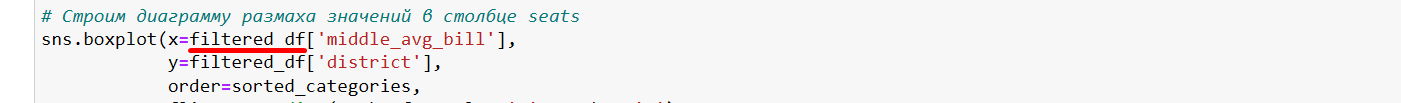

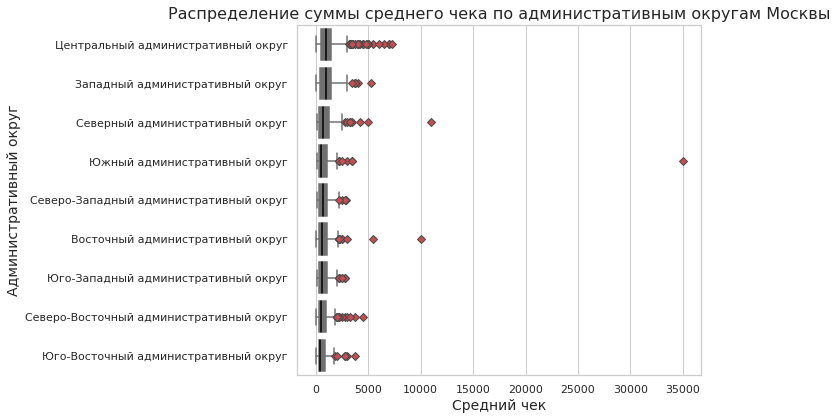

In [145]:
# Вычисляем среднее для каждой категории
mean_seats = df.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем категории по среднему в порядке убывания
sorted_categories = mean_seats.sort_values('middle_avg_bill', ascending=False)['district']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(x=df['middle_avg_bill'],
            y=df['district'],
            order=sorted_categories,
            flierprops=dict(markerfacecolor='r', marker='D'),
            boxprops={'color': box_color},
            whiskerprops={'color': box_color},
            medianprops={'color': '#000000'},
            capprops={'color': box_color},
            saturation=1)  # насыщенность цвета

# Добавляем заголовок и метки осей
plt.title('Распределение суммы среднего чека по административным округам Москвы',fontsize=16,)
plt.xlabel('Средний чек',fontsize=14,)
plt.ylabel('Административный округ',fontsize=14,)
plt.tight_layout() 
# Выводим график
plt.show()


</font><font color='Blue'><b>Комментарий студента</b></font><br>

Убрана фильтрация датасета.

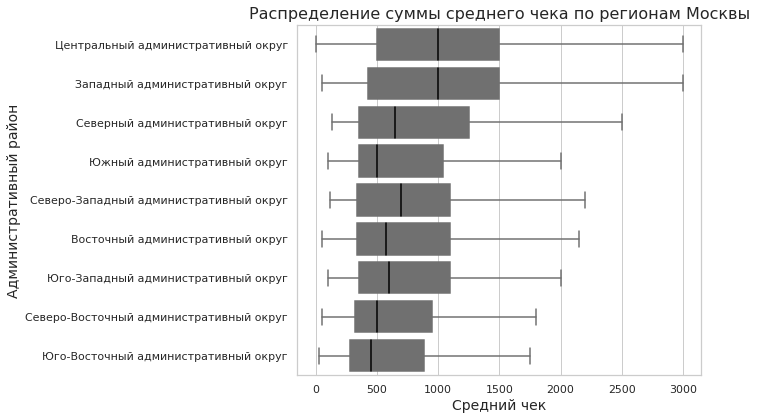

In [142]:
# Вычисляем среднее для каждой категории
mean_seats = df.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем категории по среднему в порядке убывания
sorted_categories = mean_seats.sort_values('middle_avg_bill', ascending=False)['district']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(x=df['middle_avg_bill'],
            y=df['district'],
            order=sorted_categories,
            showfliers=False,
            flierprops=dict(markerfacecolor='r', marker='D'),
            boxprops={'color': box_color},
            whiskerprops={'color': box_color},
            medianprops={'color': '#000000'},
            capprops={'color': box_color},
            saturation=1)  # насыщенность цвета

# Добавляем заголовок и метки осей
plt.title('Распределение суммы среднего чека по регионам Москвы',fontsize=16,)
plt.xlabel('Средний чек',fontsize=14,)
plt.ylabel('Административный район',fontsize=14,)
plt.tight_layout() 
# Выводим график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И тут анализ проводится по сокращенному датасету.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>

Убрана фильтрация датасета.

На представленных диаграммах видно, что средний чек в центральном АО превышает прочие АО.
У центрального и западного АО чек составляет 1000 рублей, остальные АО ниже тысячи.
Самый низкий чек в Юго-Восточном АО – всего 654 рубля. Высокие чеки в ЦАО и ЗАО можно связать с высокой стоимостью аренды помещений в данных административных округах, т.к, чем ближе расположение заведения к центру Москвы, тем выше стоимость аренды помещения. Низкие чеки в СВАО и ЮВАО также можно объяснить более низкой стоимостью аренды помещений в данных округах. 
Так же видно, что в некоторых АО имеются аномальные максимальные значения. Исключать из анализа их нельзя, т.к. вполне допустимо, что в заведении могли быть оформлены заказы на 10, 11 или 35 тысяч рублей.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Необходимо более развернуто делать промежуточный вывод: в каких округах самый высокий средний чек и чем это можно объяснить, в каких округах минимальные выбросы по среднему чеку, где самые низкие значения среднего чека и как это можно интерпретировать. </font>

---

### Промежуточный вывод


- Анализ показал, что лидирующие позиции занимают кафе, рестораны и кофейни.
- Центральный административный округ - зона присутствия бОльшего количества заведений.
- Из общего количества заведений общ.питания только 38% являются сетевыми.
- Приведен расчет для каждой категории заведения с наиболее типичным для него количеством посадочных мест.
- Средний рейтинг заведений не зависит от того, принадлежит ли заведение какой-либо сети или нет, и равняется 4,2.
- Самый низкий рейтинг у заведений быстрого питания, самый высокий – у баров и пабов. 
- Рейтинги заведений показывают самую сильную корреляцию со значениями столбца 'price'. Зависимость рейтинга от кол-во посадочных мест нулевая.
- Топ-15 Москвы, рассчитанный по кол-ву заведений, представлен такими категориями заведений, как 'булочная', 'кафе', 'кофейня', 'пиццерия', 'ресторан' и имеет рейтинги от 3.87 до 4.46.
- Средний чек в центральном АО превышает прочие АО. У центрального и западного АО чек составляет 1000 рублей, остальные АО ниже тысячи. Самый низкий чек в Юго-Восточном АО – всего 654 рубля.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'> Правильно сделан промежуточный вывод по исследовательскому анализу данных заведений общественного питания.</font>

## 4. Итоговый вывод и рекомендации

**1. Общий обзор проделанной работы.**

В ходе работы был проведен анализ сводного датасета из 8406 строк с информацией о характеристиках заведений общественного питания.
Названия столбцов соответствовали общепринятому виду `snake case` и не требовали корректировки. Наименования так же отражали суть данных (наименование одного столбца дополнено).
Все данные представлены корректным типом данных, но оптимизация столбца `chain` проведена.

Анализ пропусков показал, что основные столбцы, по которым будет проведен анализ (`category`, `district`, `rating`, `chain`), не имеют пропусков. Столбцы, содержащие информацию о среднем чеке в заведениях, имеют долю пропусков от 40 до 93%. Это может говорить о том, что пользователям, оставляющим свой отзыв и оценку заведения, не требовалось в обязательном порядке вводить эти данные. Владельцы заведения так же не были заинтересованы в указании цен, т.к. они являются не постоянными и могут ввести в заблуждение потенциальных посетителей, чем вызвать у последних негативные эмоции.

**2. Ответы на исследовательские вопросы, или главные выводы.**


- Анализ показал, что лидирующие позиции занимают кафе, рестораны и кофейни.
- Центральный административный округ - зона присутствия бОльшего количества заведений.
- Из общего количества заведений общ.питания только 38% являются сетевыми.
- Приведен расчет для каждой категории заведения с наиболее типичным для него количеством посадочных мест. Кол-во варьируется в пределах 50-86 штук. Средний рейтинг заведений не зависит от того, принадлежит ли заведение какой-либо сети или нет, и равняется 4,2.
- Самый низкий рейтинг у заведений быстрого питания, самый высокий – у баров и пабов.
- Рейтинги заведений показывают самую сильную корреляцию со значениями столбца `price`. Зависимость рейтинга от кол-во посадочных мест нулевая.
- Топ-15 Москвы, рассчитанный по кол-ву заведений, представлен такими категориями заведений, как 'кафе' 'пиццерия', 'кофейня', 'ресторан', 'булочная' и имеет рейтинги от 3.87 до 4.46.
- Средний чек в центральном АО превышает прочие АО. У центрального и западного АО чек составляет 1000 рублей, остальные АО ниже тысячи. Самый низкий чек в Юго-Восточном АО – всего 654 рубля.

**3. Рекомендации на основе анализа данных.**

- Рассмотреть открытие заведения в **Центральном административном округе**, так как там высокая концентрация потенциальных клиентов и количество функционирующих заведений (2242 шт.) превышает 26% от общего количества по всей Москве.
- Ориентироваться на средний ценовой сегмент **для данного района (1000 рублей на человека)**. На начальном этапе разработать меню и мероприятия, позволяющие снизить средний чек ниже 1000 рублей с целью привлечения потенциальных постоянных клиентов.
- Обратить внимание на категорию **кафе или ресторана**, так как они наиболее популярны и занимают 50 % от общего числа заведений в Центральном административном округе **(рестораны – 670 шт./29.88%, кафе – 464 шт./20.7%)**.
- При выборе варианта использования франшизы, отдавать предпочтение кофейне или пиццерии. Они достаточно популярны как в целом в Москве, так и в Центральном административном округе **(кофейни – 428 шт./19.09%, пиццерии – 113 шт./5.04%)**.
- При выборе площади заведения ориентироваться на то, что **среднее кол-во посадочных мест в заведении варьируется**, от **50 до 86 шт**. Пиццерии, булочные, кафе - это 50-60 мест, бары/пабы и рестораны - 82-86 мест. Заведения быстрого питания - 65 мест, столовые и кофейни - 76-80 мест.
- При выборе графика работы обратить внимание, что средний чек в ресторанах, кафе, пиццериях, работающих НЕ ежедневно и НЕ круглосуточно, несколько выше **(кафе 600 руб./ 425 руб., пиццерия 600 руб./350 руб., ресторан 1250 руб./900 руб.)**. У "лидеров" рейтинга (кафе и ресторанов) чек выше в среднем на 175 и 350 рублей соответственно. У **кофеен** при круглосуточном режиме работы средний **чек увеличивается более чем в 4 раза**: 1750 рублей против 400. Средний чек в размере 1250 руб. в пабах и барах от круглосуточного режима работы не зависит. Это говорит о том, что оптимальный график работы не обязательно должен быть круглосуточным.
- Рассмотреть возможность внедрения системы аналитики для оптимизации бизнес-процессов заведения и возможности оперативного анализа продаж, проведения клиентской аналитики, управления запасами, закупками и операционными показателями.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошее обобщение всего исследования. 👍</font>
<br><font color='DarkMagenta'>👉 После исправления ошибок его необходимо откорректировать.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Иван, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Провести анализ количества заведений общественного питания в абсолютных и относительных значениях. Провести анализ количества заведений по административным районам в абсолютных и относительных значениях. Провести анализ количества заведений по ЦАО в абсолютных и относительных значениях. Переделать проект в соответствии с требованиями к оформлению проекта. Исправить фильтрацию выбросов при анализе посадочных мест заведений. Переделать анализ рейтинга заведений по всему датасету. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы на русском языке. Сделать расчет значения среднего рейтинга для разных ценовых категорий заведений. Переделать визуализацию анализа рейтинга и ценовой категории. Сделать выводы анализа между рейтингом и категорией с самой сильной связью. Создать сводную таблицу с наименованием, категорией, количеством и средним рейтингом сетевых заведений. Визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха. Переделать визуализацию анализа среднего чека по округам по всему датасету.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>